In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# May seem a little magic but these are the values set out in the timing test script
# see script for more details
n_templates = np.arange(10) + 1
dim_tests = 11426 / np.asarray([1, 2, 4, 8, 16])
n_qsos = np.geomspace(50, 2000, 5, dtype=int)

dim_times_final = np.load("timings/dim_times_nearly.npy")
qso_times_final = np.load("timings/qso_times_nearly.npy")
template_times_final = np.load("timings/template_times_nearly.npy")

nearly_data = [qso_times_final, template_times_final, dim_times_final]
x = [n_qsos, n_templates, dim_tests]

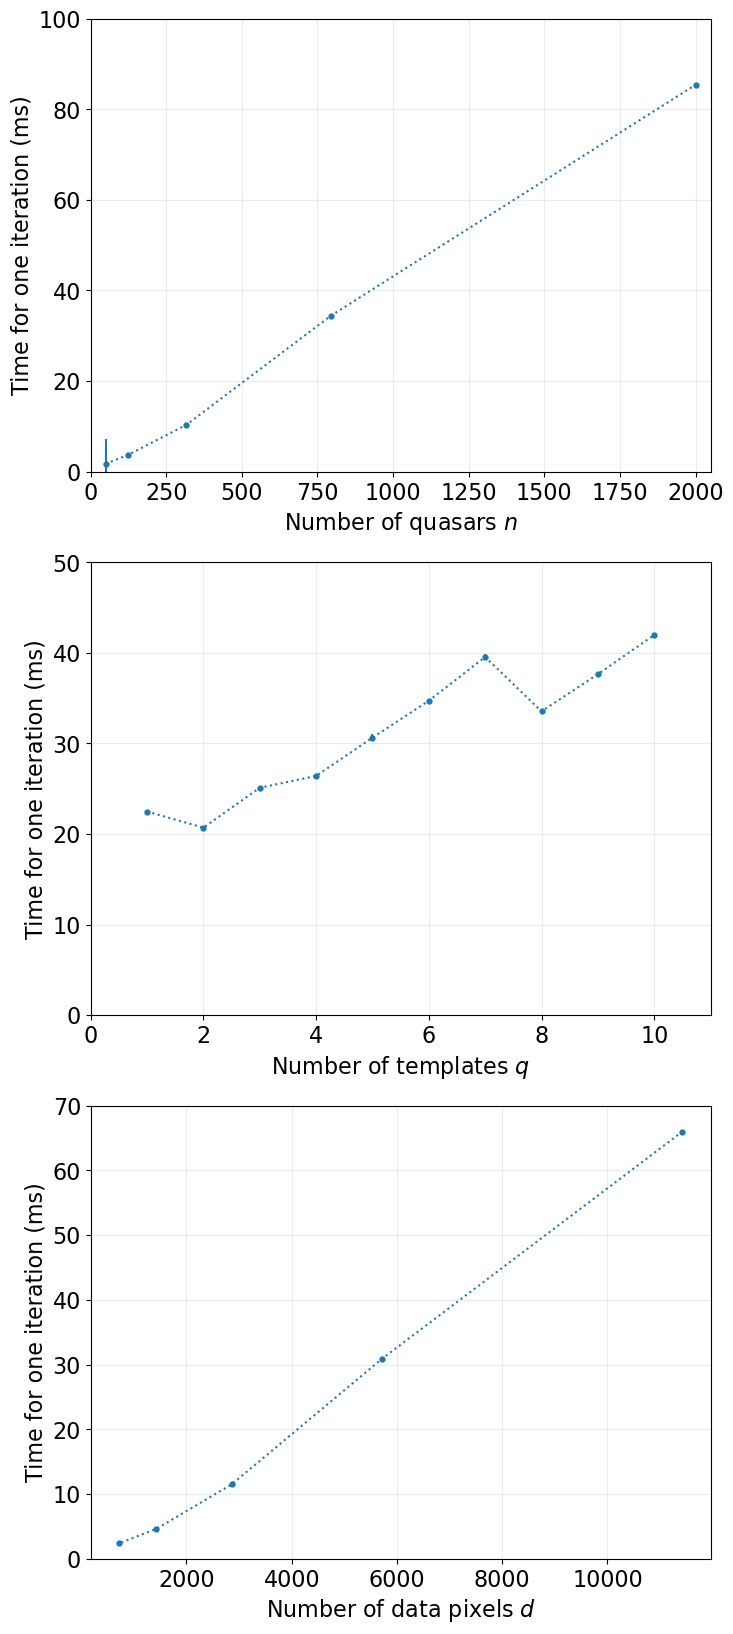

In [3]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(3, 1, figsize=(8, 20))

for i, times in enumerate(nearly_data):
    times_mean = np.median(times, axis=1) * 1000
    times_std = np.std(times, axis=1) * 1000

    ax[i].errorbar(x[i], times_mean, yerr=times_std, ls="dotted", marker=".", ms=7, label="Nearly-NMF")
    ax[i].set(ylim=(0, (np.max(times_mean) // 10 + 1) * 10))
    ax[i].grid(alpha=0.25)

ax[0].set(xlabel="Number of quasars $n$", ylabel="Time for one iteration (ms)", xlim=(0, 2050), ylim=(0, 100))
ax[1].set(xlabel="Number of templates $q$", ylabel="Time for one iteration (ms)", xlim=(0, 11))
ax[2].set(xlabel="Number of data pixels $d$", ylabel="Time for one iteration (ms)")
plt.savefig("plots/timing.pdf", bbox_inches="tight", dpi=1200)

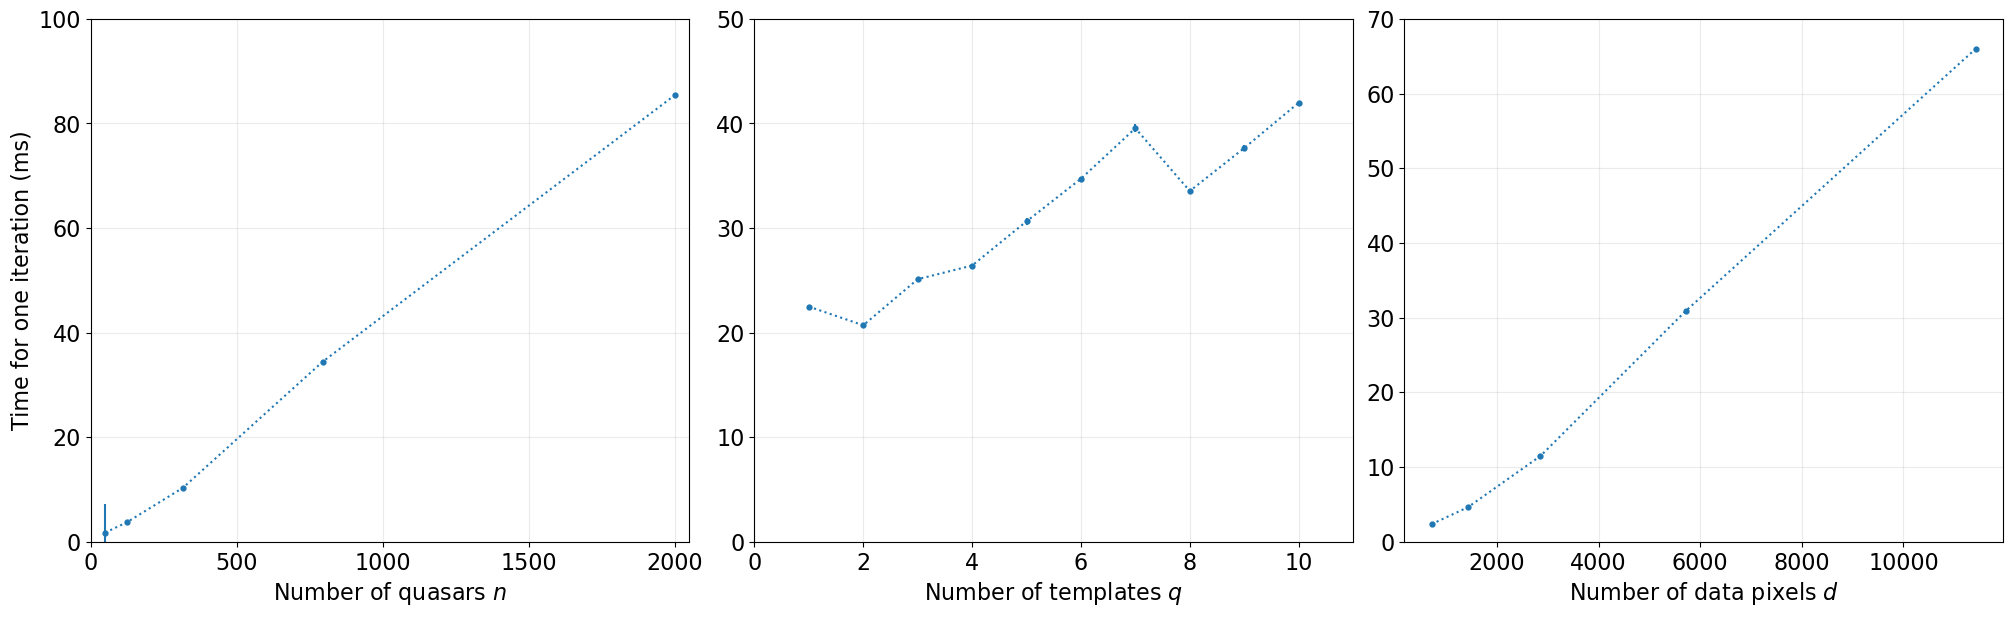

In [4]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 3, figsize=(20, 6), layout="constrained")

for i, times in enumerate(nearly_data):
    times_mean = np.median(times, axis=1) * 1000
    times_std = np.std(times, axis=1) * 1000

    ax[i].errorbar(x[i], times_mean, yerr=times_std, ls="dotted", marker=".", ms=7, label="Nearly-NMF")
    ax[i].set(ylim=(0, (np.max(times_mean) // 10 + 1) * 10))
    ax[i].grid(alpha=0.25)

ax[0].set(xlabel="Number of quasars $n$", ylabel="Time for one iteration (ms)", xlim=(0, 2050), ylim=(0, 100))
ax[1].set(xlabel="Number of templates $q$", xlim=(0, 11))
ax[2].set(xlabel="Number of data pixels $d$")
plt.savefig("plots/timing.pdf", bbox_inches="tight", dpi=1200)

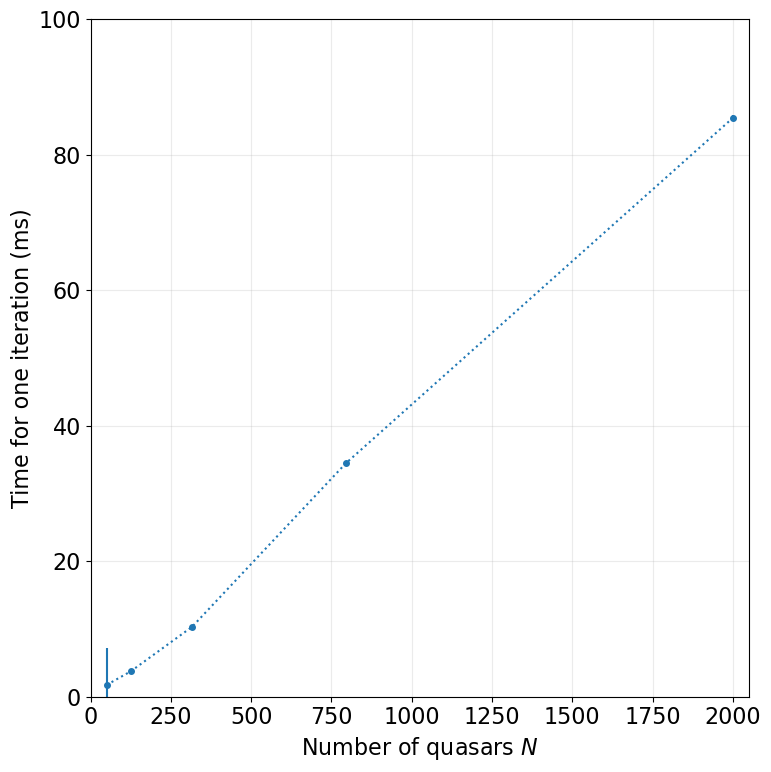

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

times_mean = np.median(nearly_data[0], axis=1) * 1000
times_std = np.std(nearly_data[0], axis=1) * 1000

plt.errorbar(x[0], times_mean, yerr=times_std, ls="dotted", marker=".", ms=8, label="Nearly-NMF")
plt.grid(alpha=0.25)
plt.xlim(0, 2050)
plt.ylim(0, 100)
plt.xlabel("Number of quasars $N$")
plt.ylabel("Time for one iteration (ms)")

plt.tight_layout()

# plt.savefig("plots/timing_qsos.pdf", bbox_inches="tight", dpi=256)

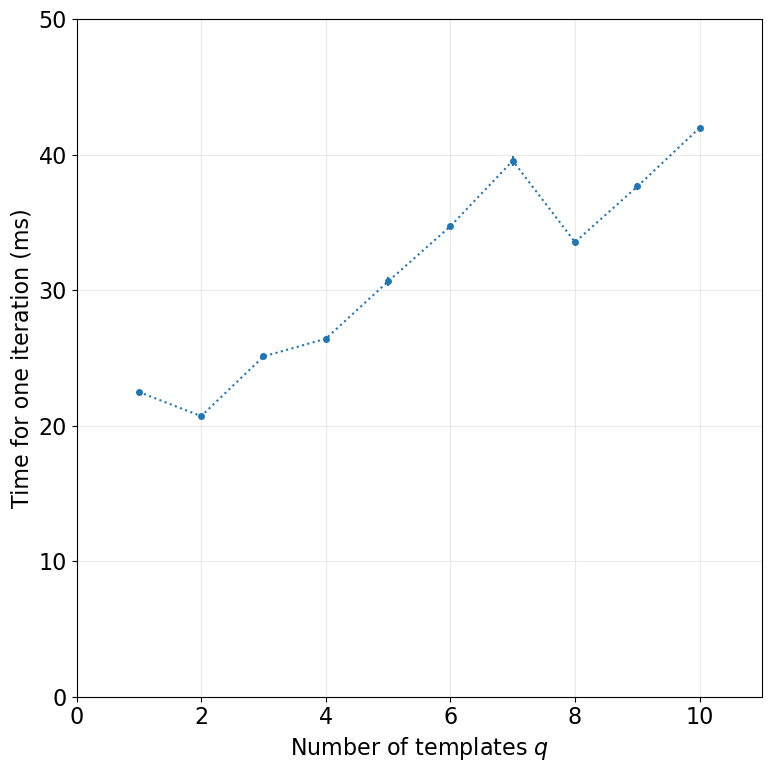

In [6]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8, 8))

times_mean = np.median(nearly_data[1], axis=1) * 1000
times_std = np.std(nearly_data[1], axis=1) * 1000

plt.errorbar(x[1], times_mean, yerr=times_std, ls="dotted", marker=".", ms=8, label="Nearly-NMF")
plt.grid(alpha=0.25)
plt.xlim(0, 11)
plt.ylim(0, (np.max(times_mean) // 10 + 1) * 10)
plt.xlabel("Number of templates $q$")
plt.ylabel("Time for one iteration (ms)")

plt.tight_layout()

# plt.savefig("plots/timing_templates.pdf", bbox_inches="tight", dpi=256)

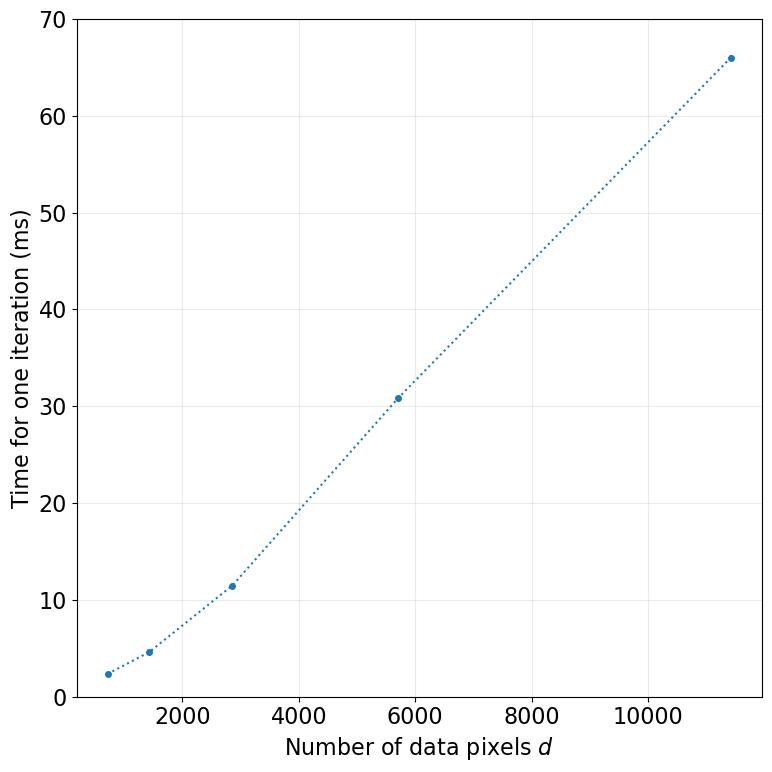

In [7]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8, 8))

times_mean = np.median(nearly_data[2], axis=1) * 1000
times_std = np.std(nearly_data[2], axis=1) * 1000

plt.errorbar(x[2], times_mean, yerr=times_std, ls="dotted", marker=".", ms=8, label="Nearly-NMF")
plt.grid(alpha=0.25)
# plt.xlim(0, 11)
plt.ylim(0, (np.max(times_mean) // 10 + 1) * 10)
plt.xlabel("Number of data pixels $d$")
plt.ylabel("Time for one iteration (ms)")

plt.tight_layout()

# plt.savefig("plots/timing_pixels.pdf", bbox_inches="tight", dpi=256)